In [23]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [48]:
#DataFrames

#Starting with Worldnews, the largest dataset.
worldnews_text_c = pd.read_csv('../data/wdms/count/worldnewsapi/lemmed/text.csv',index_col=0)
worldnews_title_c = pd.read_csv('../data/wdms/count/worldnewsapi/lemmed/title.csv',index_col=0)

#Now let's add in Ground News, which has the most interesting metadata.
groundnews_title_c = pd.read_csv('../data/wdms/count/groundnews/lemmed/title.csv',index_col=0)
groundnews_text_c = pd.read_csv('../data/wdms/count/groundnews/lemmed/source.csv',index_col=0)

#And finally, NewsAPI.
news_title_c = pd.read_csv('../data/wdms/count/newsapi/lemmed/title.csv',index_col=0)
news_text_c = pd.read_csv('../data/wdms/count/newsapi/lemmed/content.csv',index_col=0)



C:\Users\Owner\AppData\Local\Temp\ipykernel_41156\3535502304.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  worldnews_text_c = pd.read_csv('../data/wdms/count/worldnewsapi/lemmed/text.csv',index_col=0)
C:\Users\Owner\AppData\Local\Temp\ipykernel_41156\3535502304.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  worldnews_title_c = pd.read_csv('../data/wdms/count/worldnewsapi/lemmed/title.csv',index_col=0)


In [49]:
#An example word-document matrix. This comes from WorldNewsApi's text column.
worldnews_text_c.head()

,authors,country,sentiment,url,said,transgender,people,woman,school,gender,...,products,methodology,studentathlete,coal,fetus,midterm,cofe,coincided,preservation,refuted
0,DASHA LITVINOVA,us,0.311,https://apnews.com/article/russia-lgbtq-crackd...,0,46,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Daniel Yo-Ling,us,0.134,https://thediplomat.com/2023/11/where-do-trans...,0,38,9,6,0,15,...,0,0,0,0,0,0,0,0,0,0
2,Deneen Broadnax,us,0.12,https://worldnewsera.com/news/science/transgen...,0,36,21,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,Deeksha Teri,in,0.06,https://indianexpress.com/article/education/cl...,5,31,2,0,12,12,...,0,0,0,0,0,0,0,0,0,0
4,Lois Kirkup,ca,0.481,https://ottawacitizen.com/news/local-news/phot...,0,35,35,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
news_title_c.head()

,author,publishedAt,source,url,urlToImage,transgender,trans,gender,care,ban,...,lost,mark,net,medium,men,mmwr,month,named,national,licenses
0,Grace Dean,2024-01-29T14:33:43Z,business-insider,https://www.businessinsider.com/new-york-resta...,https://i.insider.com/65b796ba6c8f0a134f7aa55e...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Kiara Alfonseca, Lilia Geho",2024-01-24T20:16:13Z,abc-news,https://abcnews.go.com/US/ohio-senate-override...,https://i.abcnewsfe.com/a/46d2385c-3cff-40a4-9...,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Megan Janetsky / AP,2024-01-16T04:15:00Z,time,https://time.com/6555824/transgender-lgbt-kill...,https://api.time.com/wp-content/uploads/2024/0...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AMY BETH HANSON / AP,2024-01-31T16:25:37Z,time,https://time.com/6590528/utah-joins-states-reg...,https://api.time.com/wp-content/uploads/2024/0...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PAT EATON-ROBB / AP,2024-01-25T20:04:28Z,time,https://time.com/6588724/transgender-veterans-...,https://api.time.com/wp-content/uploads/2024/0...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#Preparing the WorldNews dataFrames for the creation of Word-Clouds. Creating a running total count of word frequency and returning
#A numeric Series of the 100 most frequent words, indexed by word, and containing frequency. We can use this to build the word-cloud.
dfs=[worldnews_title_c,worldnews_text_c]
wc_sums=[]
titles=['WorldNewsAPI (Title)','WorldNewsAPI (Text)']

for df in dfs:
    df.iloc[:,4:]=df.iloc[:,4:].apply(pd.to_numeric)
    wc_sums += [df.iloc[:,4:].sum()[:100]]
    
#Same for GroundNews
dfs=[groundnews_title_c,groundnews_text_c]
titles+=['GroundNews (Title)','GroundNews (Text)']

for df in dfs:
    df.iloc[:,5:]=df.iloc[:,5:].apply(pd.to_numeric)
    wc_sums += [df.iloc[:,5:].sum()[:100]]

#Finally, same for NewsAPI
#Same for GroundNews
dfs=[news_title_c,news_text_c]
titles+=['NewsAPI (Title)','NewsAPI (Text)']

for df in dfs:
    df.iloc[:,5:]=df.iloc[:,5:].apply(pd.to_numeric)
    wc_sums += [df.iloc[:,5:].sum()[:100]]

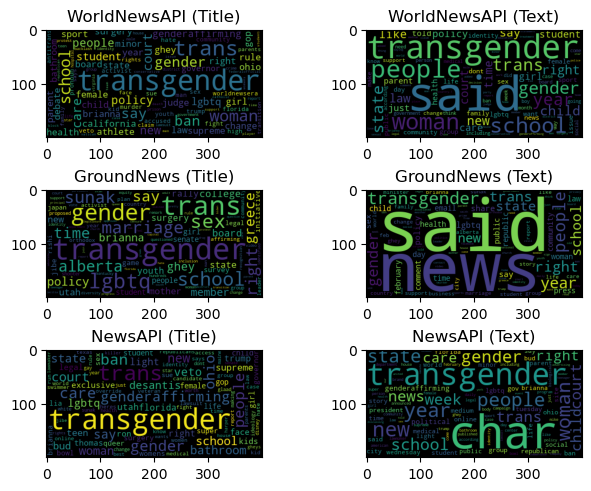

In [57]:
#Making Word Clouds from the Various News Sources.
wordclouds = [WordCloud().generate_from_frequencies(sums) for sums in wc_sums]
fig,ax=plt.subplots(3,2,constrained_layout = True)
for i in range(3):
    for j in range(2):
        ax[i,j].imshow(wordclouds[2*i+j])
        ax[i,j].set_title(titles[2*i+j])

# First Thoughts

In all three data sources, we appeared to get much stronger results by looking at the title than by looking at the text. This is likely because of the presence of specific 'semi-stop' words which don't convey the prime meaning of the story, but nevertheless occur often in a news article. These are words like ***news*** and ***said***, which are very prominent in the web-scraped Ground News source text, along with time-words such as *day, week, month, year*, etc. 

### Some other thoughts:

* The GroundNews Text appears to be the weakest in terms of strong meaning conveyed by the WordCloud.
    * This makes sense as it was scraped from websites with disparate HTML sources.
* NewsAPI's Text contains an odd most popular word, **char**, which I can't really explain the presence of. 
    * This text came from an API and wasn't scraped, so the text content should contain only the actual text. I wonder if this is due to an encoding error on python's part.
* Since the topic is ***Transgender***, it seems a good test of text quality that the most popular word in the wordcloud is, in fact, *transgender*. This is true for all three *Title* data-sets, so I'll work with them primarily.
    * This trend may not hold for TFIDF analysis. I'll keep using a variety of text datasets, as long as I have them available. But we're testing the titles first and foremost.

# TFIDF WordClouds